Using `tf-idf` as the text representation tool.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
labelled_data = pd.read_csv('./data/rotten_tomatoes_20200726.csv', index_col=0,header=0, 
                            encoding = "utf8")
labelled_data.head(2)

,text,Action and Adventure,Animation,Art House and International,Comedy,Drama,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,fresh,rotten,Other
0,A distinctly gallows take on contemporary fina...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,It's an allegory in search of a meaning that n...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


In [4]:
labelled_data.shape

(48755, 15)

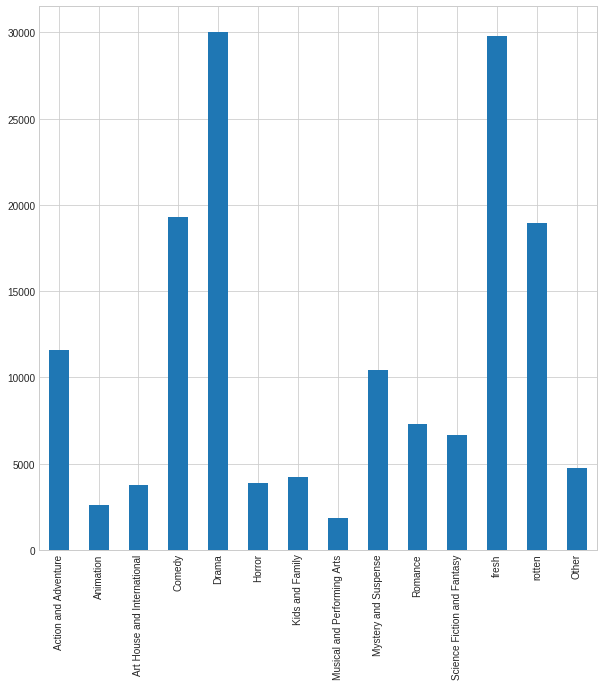

In [5]:
plt.figure(figsize=(10, 10))
labelled_data.iloc[:, 1:].sum(axis = 0, skipna = True).plot(kind='bar')

In [6]:
y_df = labelled_data.iloc[:, 1:]

In [7]:
tags = list(y_df.columns)
tags

['Action and Adventure',
 'Animation',
 'Art House and International',
 'Comedy',
 'Drama',
 'Horror',
 'Kids and Family',
 'Musical and Performing Arts',
 'Mystery and Suspense',
 'Romance',
 'Science Fiction and Fantasy',
 'fresh',
 'rotten',
 'Other']

In [8]:
Y = y_df.values
Y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

## Handle Review Data

In [9]:
import textacy
#import en_core_web_sm
nlp = textacy.load_spacy_lang("en_core_web_md")

import re

In [10]:
sample_text = labelled_data.text[250]
sample_text

"It was hard for me to concentrate on My Dog Skip because there was someone in the theater who wouldn't shut up: the narrator. The year is 1942. As the Allies unite overseas to keep the world safe for democracy, there are voices at home that are barely heard. One of them belongs to Willie Morris, a shy and gawky eight-year-old whose childhood is even more quiet and isolated than his home town of Yazoo, Mississippi. An only child, ignored at school and uncomfortable with girls, Willie"

In [11]:
doc = textacy.make_spacy_doc(sample_text)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator HashingVectorizer from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MLPClassifier 

In [12]:
#entities={(i:i.label_) for i in doc.ents}
entities={}
for i in doc.ents:
    entities[str(i)] = i.label_
entities

{'My Dog Skip': 'PRODUCT',
 'The year is 1942': 'DATE',
 'One': 'CARDINAL',
 'Willie Morris': 'PERSON',
 'eight-year-old': 'DATE',
 'Yazoo': 'GPE',
 'Mississippi': 'GPE',
 'Willie': 'PERSON'}

In [13]:
import textacy.ke
# textacy.ke.textrank(doc, normalize="lemma", topn=10)

# chunk_lst = [t[0] for t in (textacy.ke.textrank(doc, normalize="lemma", topn=10)) if (len(t[0]) > 1)]
# replace_lst = ['_'.join(t.split()) for t in chunk_lst]

# replace_dict = dict(zip(chunk_lst, replace_lst))
# replace_dict

In [14]:
textacy.ke.sgrank(doc, ngrams=(1, 2, 3, 4), normalize="lemma", topn=10)

[('home town', 0.18492135953603484),
 ('Willie Morris', 0.14748088313679308),
 ('world safe', 0.11705740198009011),
 ('Dog Skip', 0.10104724356293682),
 ('year', 0.0662299954532286),
 ('Allies', 0.023146766633536167),
 ('gawky', 0.02126788787916061),
 ('voice', 0.021222700334635376),
 ('shy', 0.021044170906498204),
 ('democracy', 0.02091695597658253)]

In [15]:
bot = doc._.to_bag_of_terms(ngrams=(1, 2, 3), entities=True, weighting="count",as_strings=True)
sorted(bot.items(), key=lambda x: x[1], reverse=True)[:15]

[('year', 2),
 ('home', 2),
 ('Willie', 2),
 ('hard', 1),
 ('concentrate', 1),
 ('Dog', 1),
 ('Skip', 1),
 ('theater', 1),
 ('shut', 1),
 ('narrator', 1),
 ('1942', 1),
 ('Allies', 1),
 ('unite', 1),
 ('overseas', 1),
 ('world', 1)]

In [16]:
textacy.ke.yake(doc, ngrams=(1, 2, 3, 4), normalize="lemma", topn=10)

[('Dog Skip', 0.3299465961990796),
 ('Willie', 0.40674371596081627),
 ('year', 0.5353316451896019),
 ('Mississippi', 0.547698045686597),
 ('home', 0.5653066986987951),
 ('narrator', 0.6352613823967367),
 ('Allies', 0.6447757895384318),
 ('Morris', 0.6470933587771042),
 ('Yazoo', 0.6470933587771042),
 ('Willie Morris', 0.7157484079492707)]

In [17]:
new_doc = doc.text
for k in sorted(entities.keys(), key = len, reverse = True):
    
    new_doc = new_doc.replace(k, entities[k])
    
print(new_doc)

It was hard for me to concentrate on PRODUCT because there was someone in the theater who wouldn't shut up: the narrator. DATE. As the Allies unite overseas to keep the world safe for democracy, there are voices at home that are barely heard. CARDINAL of them belongs to PERSON, a shy and gawky DATE whose childhood is even more quiet and isolated than his home town of GPE, GPE. An only child, ignored at school and uncomfortable with girls, PERSON


In [18]:
def ner_replace(text):
    doc = textacy.make_spacy_doc(text,lang=nlp)
    entities={}
    for i in doc.ents:
        entities[str(i)] = i.label_
    new_doc = doc.text
    for k in sorted(entities.keys(), key = len, reverse = True):
        new_doc = new_doc.replace(k, entities[k])
    return(new_doc)

In [19]:
replaced = ner_replace(sample_text)
replaced

"It was hard for me to concentrate on My Dog Skip because there was someone in the theater who wouldn't shut up: the narrator. DATE. As the ORG unite overseas to keep the world safe for democracy, there are voices at home that are barely heard. CARDINAL of them belongs to PERSON, a shy and gawky DATE whose childhood is even more quiet and isolated than his home town of GPE, GPE. An only child, ignored at school and uncomfortable with girls, PERSON"

In [20]:
def np_replace(text):
    doc = textacy.make_spacy_doc(text,lang=nlp)
    chunk_lst = [t[0] for t in (textacy.ke.textrank(doc, normalize="lemma", topn=10)) if (len(t[0]) > 1)]
    replace_lst = ['_'.join(t.split()) for t in chunk_lst]

    replace_dict = dict(zip(chunk_lst, replace_lst))

    new_doc = doc.text
    for k in sorted(replace_dict.keys(), key = len, reverse = True):
        new_doc = new_doc.replace(k, replace_dict[k])
    return(new_doc)

In [21]:
np_replace(replaced)

"It was hard for me to concentrate on My Dog_Skip because there was someone in the theater who wouldn't shut up: the narrator. DATE. As the ORG unite overseas to keep the world_safe for democracy, there are voices at home that are barely heard. CARDINAL of them belongs to PERSON, a shy and gawky DATE whose childhood is even more quiet and isolated than his home_town of GPE, GPE. An only child, ignored at school and uncomfortable with girls, PERSON"

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
#data = sent_df1
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [23]:
data = labelled_data

In [24]:
data.text = data.text.str.lower()

data.text = data.text.apply(cleanHtml)
data.text = data.text.apply(cleanPunc)
data.text = data.text.apply(ner_replace)
data.text = data.text.apply(np_replace)
data.text = data.text.apply(keepAlpha)

In [25]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six',
                   'seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [26]:
data.text = data.text.apply(removeStopWords)

In [27]:
data.text.head(2)

0     distinctly gallows take  contemporary financi...
1      allegory  search   meaning  never arrives   ...
Name: text, dtype: object

In [28]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [29]:
data.text = data.text.apply(stemming)

In [30]:
data.text.head(2)

0    distinct gallow take contemporari financi more...
1    allegori search mean never arriv old fashicard...
Name: text, dtype: object

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from sklearn.feature_extraction.text import 

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.text)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [32]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(data.text, Y, test_size=0.2, 
                                                    random_state=2020)

# Modeling

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing import text
import keras.backend.tensorflow_backend as K
K.set_session
import shap

Using TensorFlow backend.


In [34]:
num_tags = y_df.shape[1]
num_tags

14

In [35]:
class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix

In [36]:
VOCAB_SIZE = 3000
#train_post = merged['Body'].values[: train_size]
#test_post = merged['Body'].values[train_size: ]
processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(text_train)
X_train = processor.transform_text(text_train)
X_test = processor.transform_text(text_test)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39004, 3000), (9751, 3000), (39004, 14), (9751, 14))

In [41]:
import pickle

with open('./data/processed_data_20200731.pickle', 'wb') as pf:
    pickle.dump(X_train, pf)
    pickle.dump(X_test, pf)
    pickle.dump(y_train, pf)
    pickle.dump(y_test, pf)

In [38]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
X_train[0].sum()

17.0

In [40]:
text_train.iloc[27361]

'person show us still prime play everi subtl nuanc degen diseas precis respect personhappili marri cardin grown children renown linguist professor start forget word receiv diagnosi earli onset alzheim diseas alic famili find bond thorough test struggl stay connect frighten heartbreak inspir c soni classic'

In [42]:
VOCAB_SIZE = 3000
def create_model(vocab_size, num_tags):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50, input_shape = (VOCAB_SIZE,), activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(num_tags, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
model = create_model(VOCAB_SIZE, num_tags)
model.fit(X_train, y_train, epochs = 10, batch_size=128, validation_split=0.1)
print('Eval loss/accuracy:{}'.format(model.evaluate(X_test, y_test, batch_size = 128)))

Instructions for updating:
Colocations handled automatically by placer.
Train on 35103 samples, validate on 3901 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
35103/35103 [==============================] - 2s 59us/sample - loss: 0.2626 - acc: 0.8926 - val_loss: 0.1199 - val_acc: 0.9539
Epoch 2/10
35103/35103 [==============================] - 2s 48us/sample - loss: 0.0980 - acc: 0.9606 - val_loss: 0.0874 - val_acc: 0.9630
Epoch 3/10
35103/35103 [==============================] - 2s 49us/sample - loss: 0.0781 - acc: 0.9669 - val_loss: 0.0806 - val_acc: 0.9648
Epoch 4/10
35103/35103 [==============================] - 2s 49us/sample - loss: 0.0704 - acc: 0.9694 - val_loss: 0.0760 - val_acc: 0.9663
Epoch 5/10
35103/35103 [==============================] - 2s 48us/sample - loss: 0.0662 - acc: 0.9711 - val_loss: 0.0747 - val_acc: 0.9665
Epoch 6/10
35103/35103 [==============================] - 2s 49us/sample - loss: 0.0632 - acc: 0.9723 - val_loss: 0.0737 - val_acc: 0.96

In [43]:
model.save('./model_20200731.model')

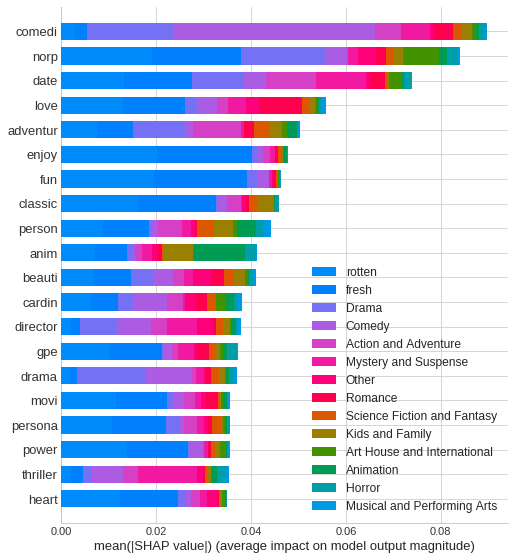

In [44]:
attrib_data = X_train[:5000]
explainer = shap.DeepExplainer(model, attrib_data)
num_explanations = 50
shap_vals = explainer.shap_values(X_test[:num_explanations])
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
    word_lookup.append(i)
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=y_df.columns)

Action and Adventure


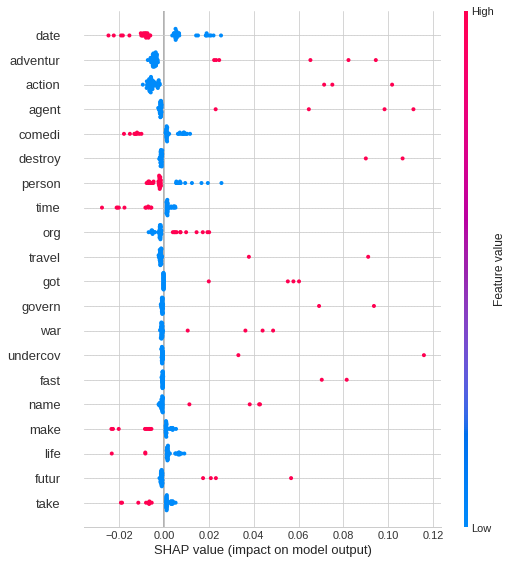

Animation


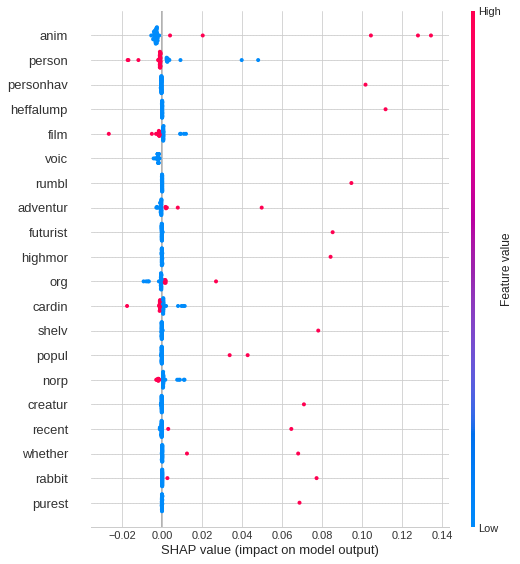

Art House and International


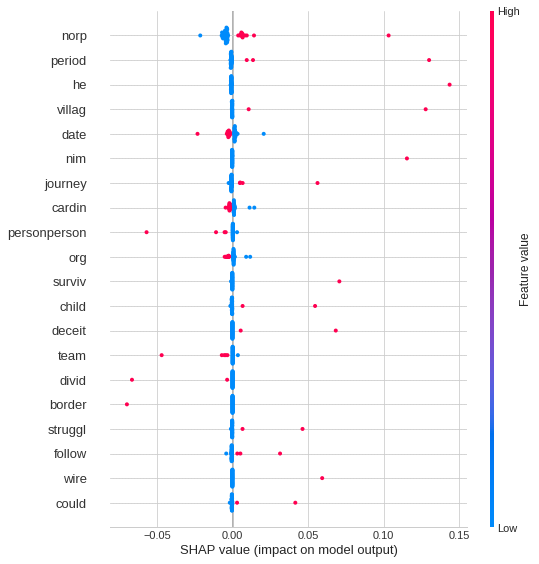

Comedy


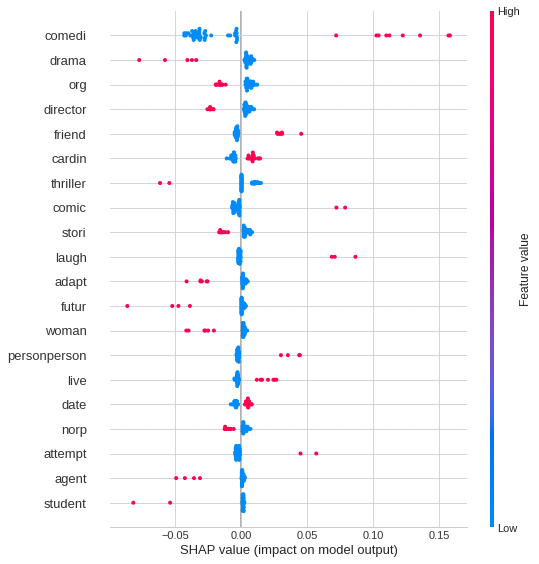

Drama


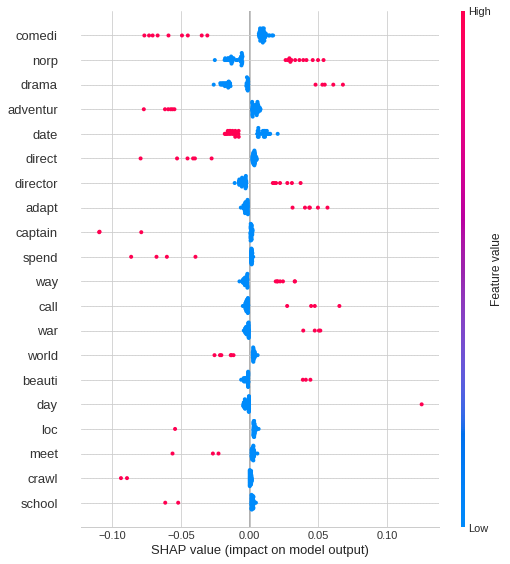

Horror


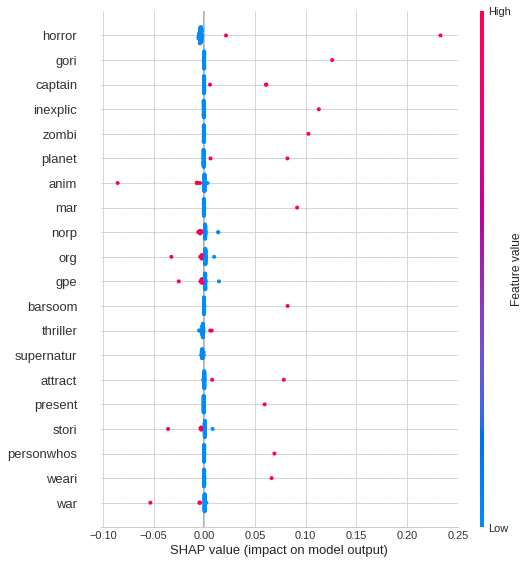

Kids and Family


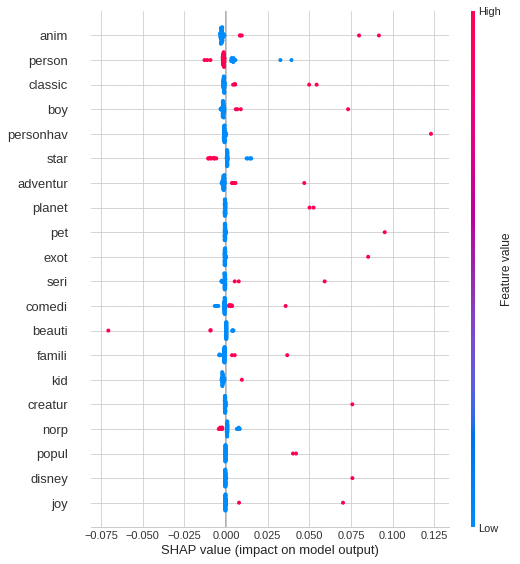

Musical and Performing Arts


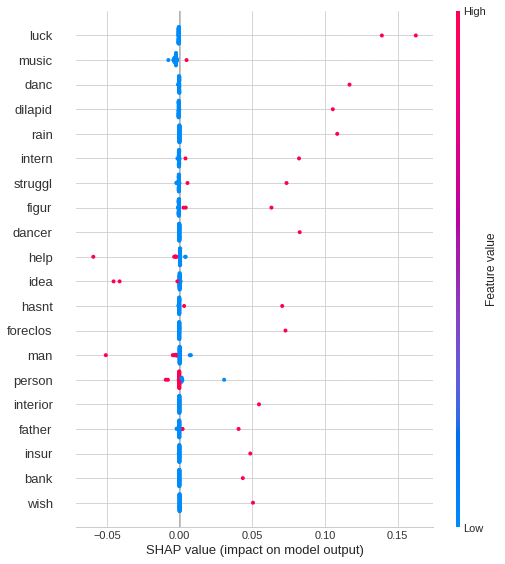

Mystery and Suspense


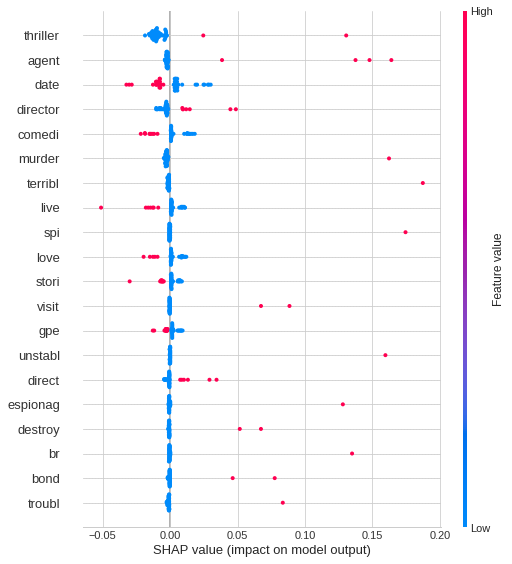

Romance


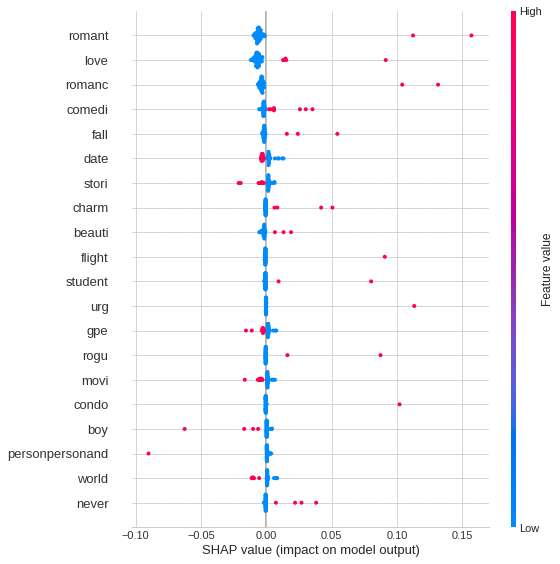

Science Fiction and Fantasy


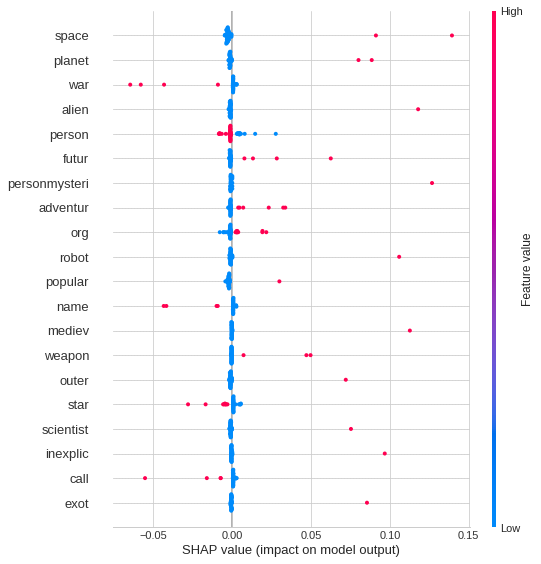

fresh


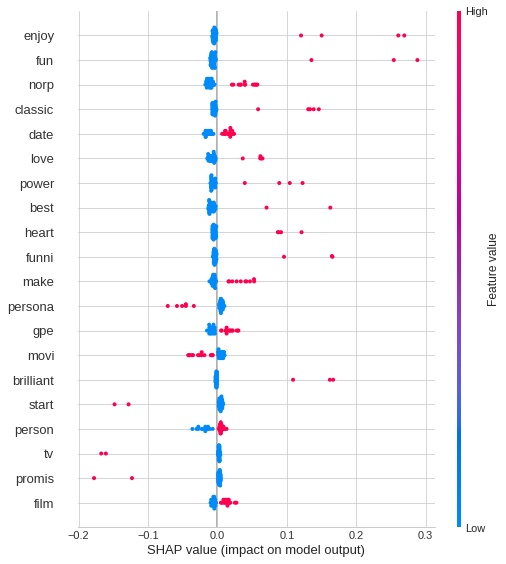

rotten


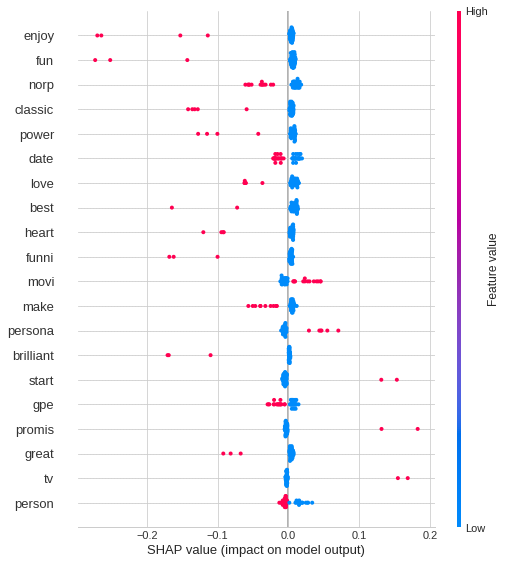

Other


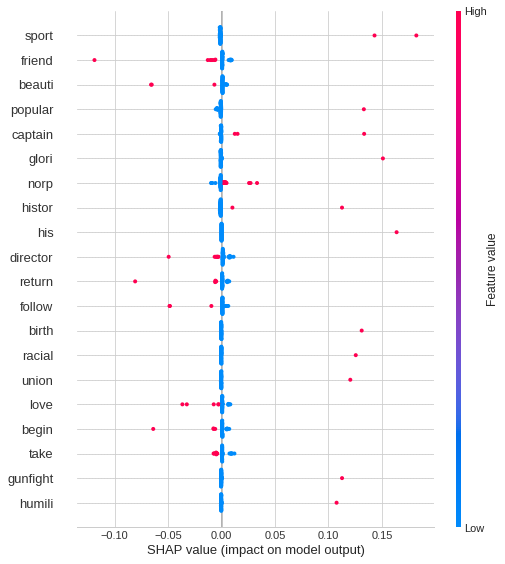

In [45]:
for i in range(14):
    print(y_df.columns[i])
    shap.summary_plot(shap_vals[i], X_test[:num_explanations], feature_names=word_lookup)

## Keras Embedding model

In [48]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 600
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [50]:
embedding_dim = 300


def create_model(vocab_size, num_tags):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(num_tags, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
model1 = create_model(VOCAB_SIZE, num_tags)
model1.fit(X_train, y_train, epochs = 10, batch_size=128, validation_split=0.1)
print('Eval loss/accuracy:{}'.format(model1.evaluate(X_test, y_test, batch_size = 128)))

Train on 35103 samples, validate on 3901 samples
Epoch 1/10
35103/35103 [==============================] - 4s 120us/sample - loss: 0.4283 - acc: 0.8098 - val_loss: 0.3814 - val_acc: 0.8357
Epoch 2/10
35103/35103 [==============================] - 4s 111us/sample - loss: 0.3697 - acc: 0.8411 - val_loss: 0.3537 - val_acc: 0.8494
Epoch 3/10
35103/35103 [==============================] - 4s 113us/sample - loss: 0.3517 - acc: 0.8495 - val_loss: 0.3478 - val_acc: 0.8517
Epoch 4/10
35103/35103 [==============================] - 4s 112us/sample - loss: 0.3456 - acc: 0.8516 - val_loss: 0.3405 - val_acc: 0.8537
Epoch 5/10
35103/35103 [==============================] - 4s 113us/sample - loss: 0.3425 - acc: 0.8526 - val_loss: 0.3404 - val_acc: 0.8533
Epoch 6/10
35103/35103 [==============================] - 4s 114us/sample - loss: 0.3410 - acc: 0.8528 - val_loss: 0.3386 - val_acc: 0.8544
Epoch 7/10
35103/35103 [==============================] - 4s 112us/sample - loss: 0.3398 - acc: 0.8534 - val_lo

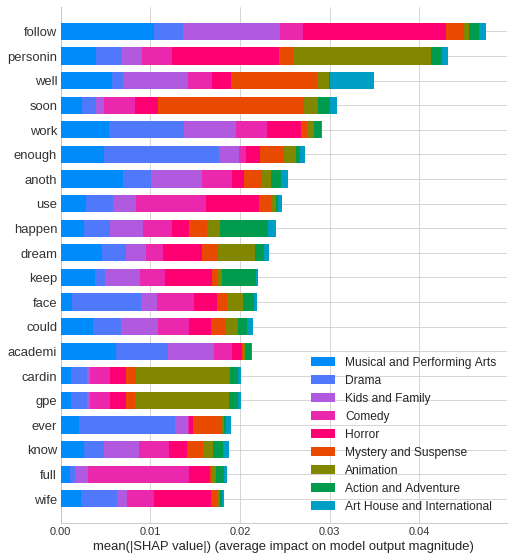

In [53]:
attrib_data = X_train[:1000]
explainer = shap.DeepExplainer(model1, attrib_data)
num_explanations = 50
shap_vals = explainer.shap_values(X_test[:num_explanations])
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
    word_lookup.append(i)
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals[5:17], feature_names=word_lookup, class_names=y_df.columns)

Classics


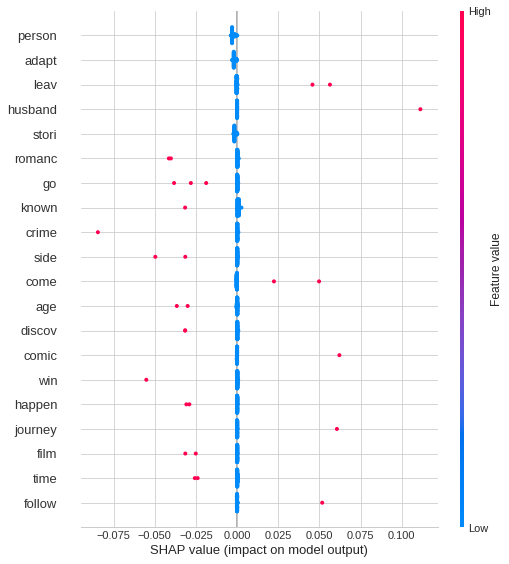

Comedy


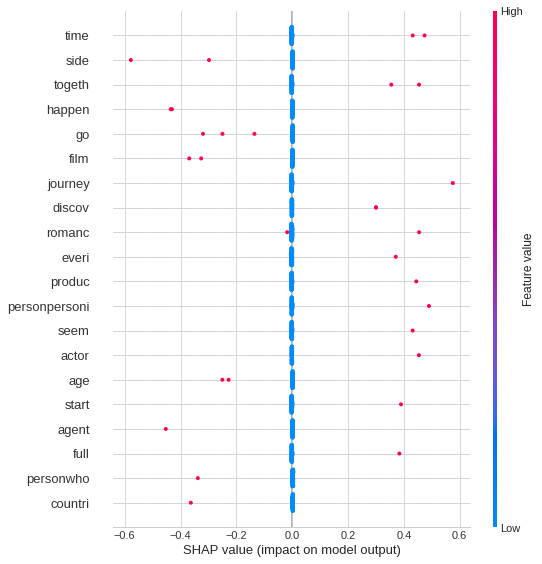

Cult Movies


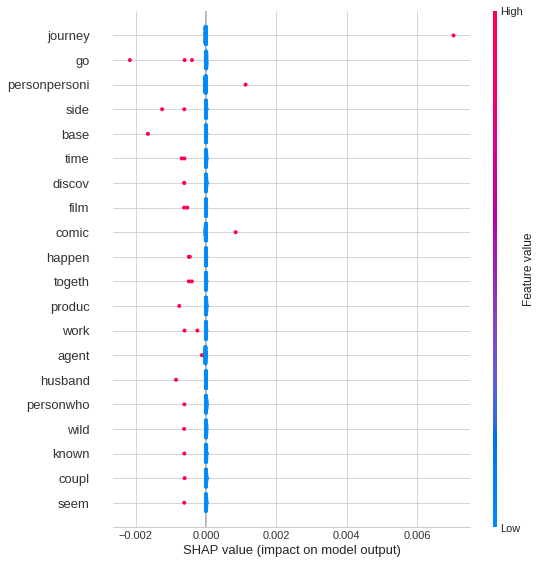

Documentary


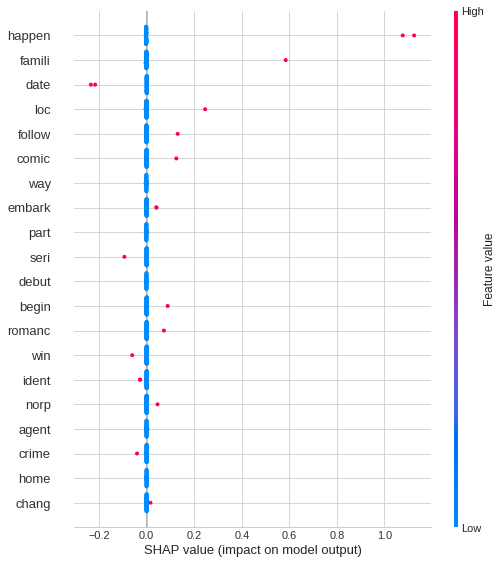

Drama


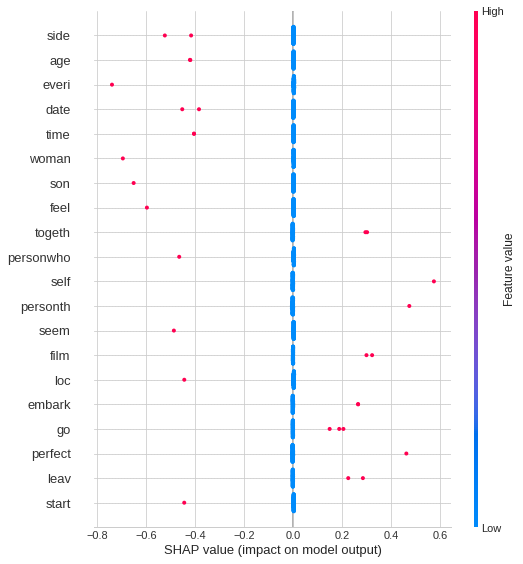

Faith and Spirituality


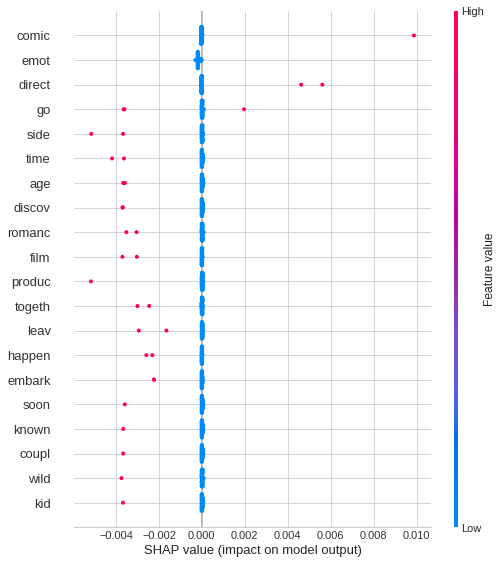

Gay and Lesbian


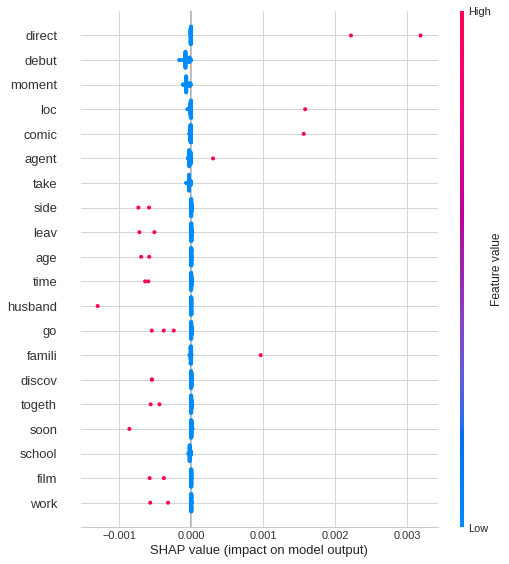

Horror


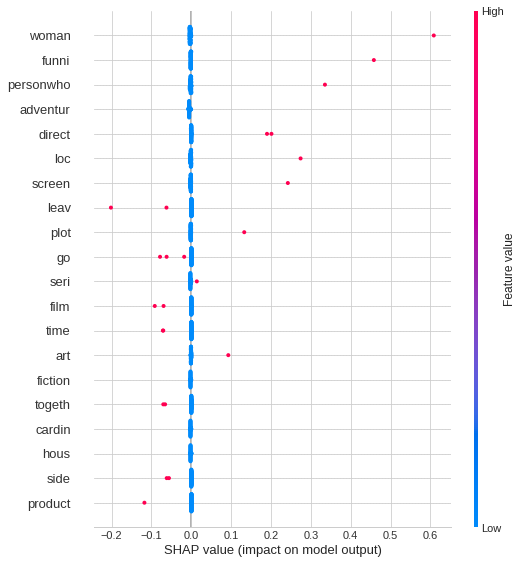

Kids and Family


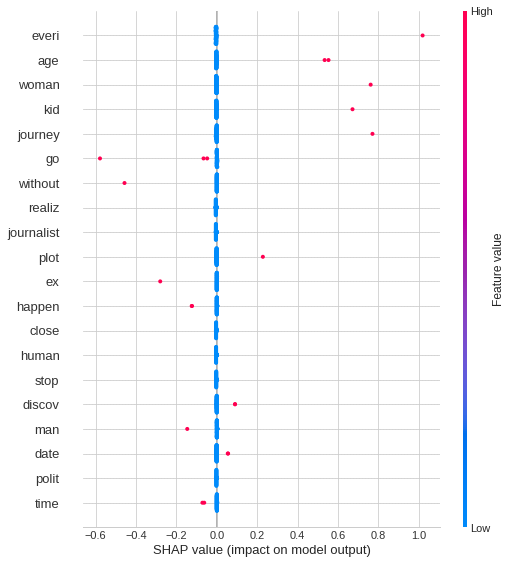

Musical and Performing Arts


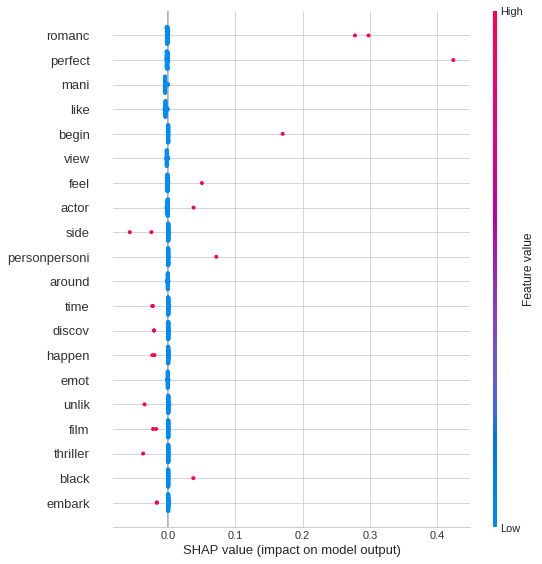

Mystery and Suspense


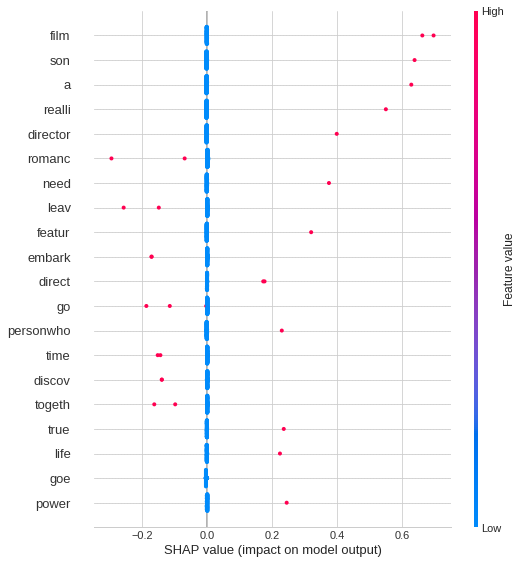

Romance


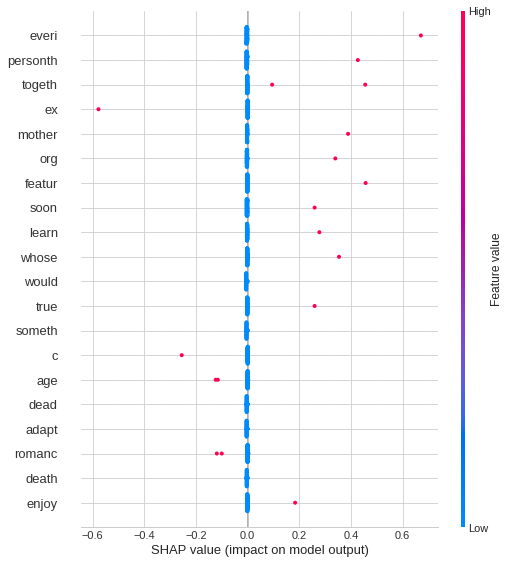

Science Fiction and Fantasy


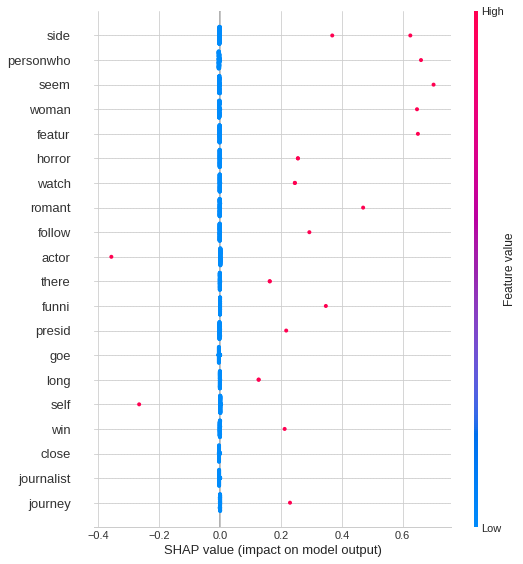

In [51]:
for i in range(14):
    print(y_df.columns[i])
    shap.summary_plot(shap_vals[i], X_test[:num_explanations], feature_names=word_lookup)

In [52]:
sent = [row.split() for row in data['text']]
sent[1]

['allegori',
 'search',
 'mean',
 'never',
 'arriv',
 'old',
 'fashicardinald',
 'bad',
 'storytel',
 'gpe',
 'distant',
 'futur',
 'persona',
 'date',
 'financ',
 'golden',
 'boy',
 'dream',
 'live',
 'civil',
 'ahead',
 'cardin',
 'watch',
 'dark',
 'shadow',
 'cast',
 'firmament',
 'facof',
 'uncontest',
 'king',
 'chauffeur',
 'midtown',
 'gpe',
 'get',
 'haircut',
 'father',
 'old',
 'barber',
 'anxious',
 'eye',
 'glu']

In [53]:
len(sent)

48755

In [54]:
import gensim

w2v_model = gensim.models.Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=30)

In [55]:
w2v_model.build_vocab(sent, progress_per=10000)



In [56]:
my_vocab = list(w2v_model.wv.vocab)
print('vocab size : %d' % len(my_vocab))

vocab size : 6152


In [57]:
from gensim.models.phrases import Phrases, Phraser
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [60]:
w1 = [stemmer.stem('adventure')]
w2v_model.wv.most_similar(positive = w1, topn = 50)

[('chauffeur', 0.20748892426490784),
 ('big', 0.19733932614326477),
 ('inert', 0.19344237446784973),
 ('diesel', 0.191201850771904),
 ('sea', 0.1827930510044098),
 ('necromut', 0.1815006285905838),
 ('gaz', 0.18040579557418823),
 ('rung', 0.17858858406543732),
 ('imbu', 0.17728130519390106),
 ('name', 0.1755579113960266),
 ('dilemma', 0.17123064398765564),
 ('wrath', 0.1692909449338913),
 ('sgt', 0.1667575091123581),
 ('pen', 0.1639113575220108),
 ('hoot', 0.16170844435691833),
 ('compris', 0.15889622271060944),
 ('kept', 0.15789256989955902),
 ('laden', 0.1576678305864334),
 ('uneven', 0.15654389560222626),
 ('scar', 0.15620030462741852),
 ('circuit', 0.15613073110580444),
 ('mask', 0.15535122156143188),
 ('bottl', 0.15304958820343018),
 ('streak', 0.15023759007453918),
 ('sisterhood', 0.14988109469413757),
 ('nicknam', 0.149126797914505),
 ('amp', 0.1490851193666458),
 ('critic', 0.149065762758255),
 ('profit', 0.14813974499702454),
 ('unwil', 0.14800770580768585),
 ('disguis', 0.147382453083992),
 ('personkelli', 0.14731283485889435),
 ('guy', 0.14715220034122467),
 ('network', 0.14691215753555298),
 ('fund', 0.1466825157403946),
 ('brainless', 0.1464897245168686),
 ('speci', 0.14646093547344208),
 ('tribe', 0.1460697501897812),
 ('mcgregor', 0.1459362655878067),
 ('profan', 0.14276763796806335),
 ('sugar', 0.14226289093494415),
 ('sit', 0.14077293872833252),
 ('slip', 0.13985246419906616),
 ('bounc', 0.13970468938350677),
 ('skull', 0.13953927159309387),
 ('knowledg', 0.13932353258132935),
 ('bio', 0.1389860361814499),
 ('legend', 0.13891083002090454),
 ('grab', 0.13890385627746582),
 ('area', 0.13873374462127686)]

In [62]:
w1 = [stemmer.stem('comedy')]
w2 = [stemmer.stem('horror')]
w2v_model.wv.most_similar(positive = w1, negative = w2, topn = 30)

[('said', 0.21640737354755402),
 ('ting', 0.21269682049751282),
 ('promis', 0.1985059529542923),
 ('foot', 0.19500097632408142),
 ('conquer', 0.18537414073944092),
 ('personbut', 0.18201696872711182),
 ('sarcast', 0.17747406661510468),
 ('upstair', 0.1754554808139801),
 ('command', 0.17490482330322266),
 ('acrobat', 0.17390696704387665),
 ('parent', 0.17247946560382843),
 ('personpersonthrow', 0.17016354203224182),
 ('succumb', 0.16797977685928345),
 ('fortun', 0.16677311062812805),
 ('persong', 0.16656161844730377),
 ('gyllenha', 0.16327537596225739),
 ('personwa', 0.1623355597257614),
 ('l', 0.15944373607635498),
 ('threat', 0.1587468981742859),
 ('immigr', 0.15813185274600983),
 ('personron', 0.15788857638835907),
 ('secret', 0.15719641745090485),
 ('slum', 0.15703833103179932),
 ('satan', 0.1562996208667755),
 ('almost', 0.15484660863876343),
 ('shtick', 0.15361683070659637),
 ('terrif', 0.1536128669977188),
 ('witch', 0.15218809247016907),
 ('southern', 0.15181896090507507),
 ('shed', 0.15125346183776855)]